In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-dataset/owid-covid-data.csv


In [2]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 10

In [3]:
df = pd.read_csv('/kaggle/input/covid19-dataset/owid-covid-data.csv')
print("="*70)
print("DATASET LOADED SUCCESSFULLY")
print("="*70)
print(f"Total Rows: {df.shape[0]:,}")
print(f"Total Columns: {df.shape[1]}")
print(f"Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"Locations: {df['location'].nunique()}")


DATASET LOADED SUCCESSFULLY
Total Rows: 166,326
Total Columns: 67
Date Range: 2020-01-01 to 2022-03-05
Locations: 238


In [4]:
# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

print("\n" + "="*70)

First 5 rows of the dataset:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0         

In [5]:
# Display column names
print("\nAll columns in the dataset:")
print(df.columns.tolist())

print("\n" + "="*70)


All columns in the dataset:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vac

In [6]:
# Basic info about the dataset
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   date                                        166326 non-null  object 
 4   total_cases                                 163293 non-null  float64
 5   new_cases                                   163133 non-null  float64
 6   new_cases_smoothed                          161150 non-null  float64
 7   total_deaths                                145451 non-null  float64
 8   new_deaths                                  145487 non-null  float64
 9   new_deaths_smoothed                         143390 non-

In [7]:
# Check missing values in key columns
key_columns = ['date', 'location', 'total_cases', 'new_cases', 
               'total_deaths', 'new_deaths', 'continent']

print("Missing values in key columns:")
print("="*70)
for col in key_columns:
    if col in df.columns:
        missing = df[col].isnull().sum()
        missing_pct = (missing / len(df)) * 100
        print(f"{col:20s}: {missing:>10,} ({missing_pct:>5.2f}%)")

Missing values in key columns:
date                :          0 ( 0.00%)
location            :          0 ( 0.00%)
total_cases         :      3,033 ( 1.82%)
new_cases           :      3,193 ( 1.92%)
total_deaths        :     20,875 (12.55%)
new_deaths          :     20,839 (12.53%)
continent           :      9,956 ( 5.99%)


In [8]:
# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])
# Remove aggregated entries (keep only individual countries)
excluded_locations = ['World', 'Europe', 'Asia', 'North America', 'South America', 
                      'Africa', 'Oceania', 'European Union', 
                      'High income', 'Upper middle income', 'Lower middle income', 'Low income']

df_countries = df[~df['location'].isin(excluded_locations)].copy()
# Fill NaN values with 0 for visualization
df_countries['new_cases'] = df_countries['new_cases'].fillna(0)
df_countries['new_deaths'] = df_countries['new_deaths'].fillna(0)
df_countries['total_cases'] = df_countries['total_cases'].fillna(0)
df_countries['total_deaths'] = df_countries['total_deaths'].fillna(0)

print("Data cleaned successfully!")
print(f"Countries after filtering: {df_countries['location'].nunique()}")
print(f"Total rows: {len(df_countries):,}")

Data cleaned successfully!
Countries after filtering: 226
Total rows: 157,128


In [9]:
# Calculate global daily totals by summing all countries
global_daily = df_countries.groupby('date').agg({
    'new_cases': 'sum',
    'new_deaths': 'sum',
    'total_cases': 'sum',
    'total_deaths': 'sum'
}).reset_index()

# Calculate 7-day moving average for smoother trends
global_daily['new_cases_7day_avg'] = global_daily['new_cases'].rolling(window=7).mean()
global_daily['new_deaths_7day_avg'] = global_daily['new_deaths'].rolling(window=7).mean()

# Calculate Case Fatality Rate (CFR)
global_daily['cfr'] = (global_daily['total_deaths'] / global_daily['total_cases'] * 100).fillna(0)

print("Global statistics calculated!")
print(f"Date range: {global_daily['date'].min()} to {global_daily['date'].max()}")
print(f"\nLatest global statistics:")
print(f"  Total Cases: {global_daily['total_cases'].iloc[-1]:,.0f}")
print(f"  Total Deaths: {global_daily['total_deaths'].iloc[-1]:,.0f}")
print(f"  CFR: {global_daily['cfr'].iloc[-1]:.2f}%")

Global statistics calculated!
Date range: 2020-01-01 00:00:00 to 2022-03-05 00:00:00

Latest global statistics:
  Total Cases: 445,129,499
  Total Deaths: 5,995,245
  CFR: 1.35%


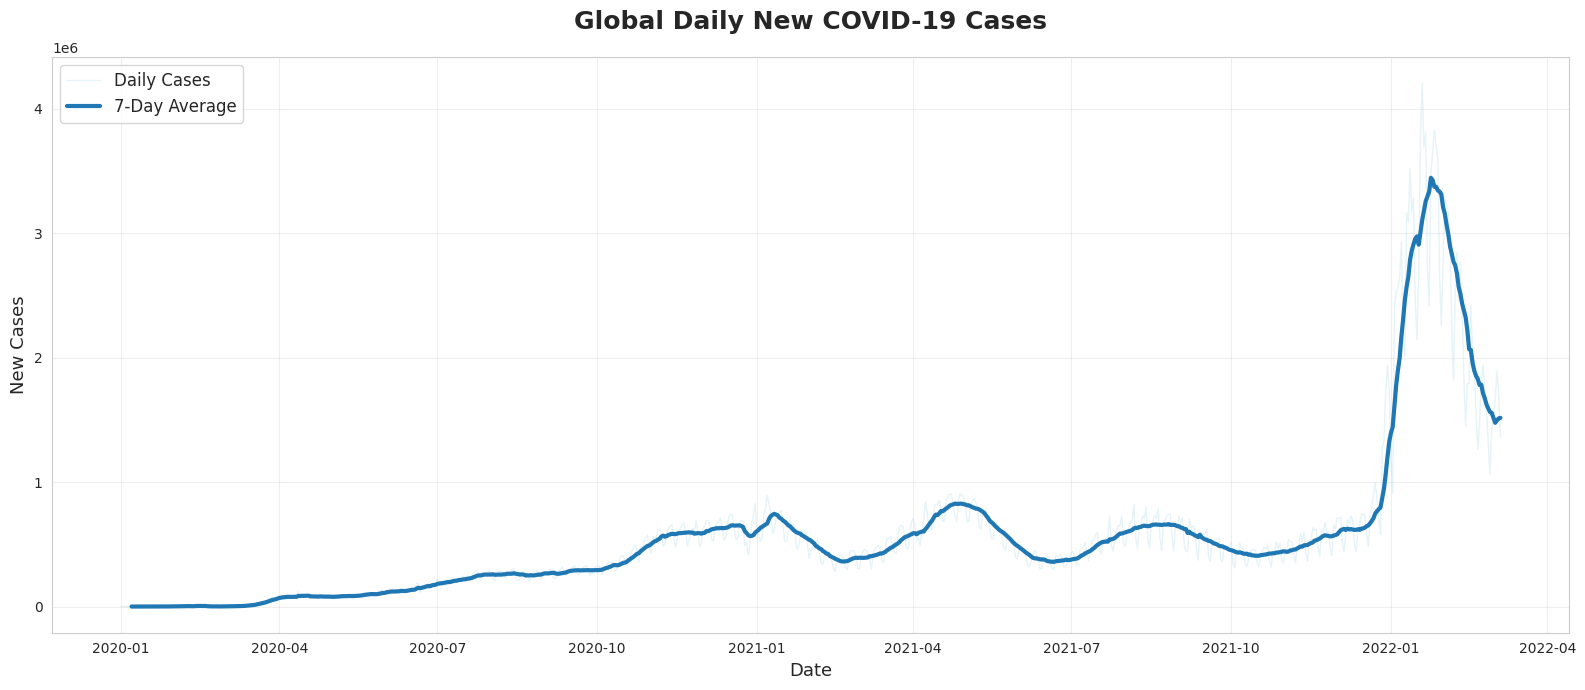

Peak daily cases: 4,206,334
Date of peak: 2022-01-19T00:00:00.000000000


In [10]:
# Plot global daily new cases
plt.figure(figsize=(16, 7))

# Plot raw daily data (light)
plt.plot(global_daily['date'], global_daily['new_cases'], 
         alpha=0.3, color='lightblue', label='Daily Cases', linewidth=1)

# Plot 7-day average (bold)
plt.plot(global_daily['date'], global_daily['new_cases_7day_avg'], 
         linewidth=3, color='#1f77b4', label='7-Day Average')

plt.title('Global Daily New COVID-19 Cases', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=13)
plt.ylabel('New Cases', fontsize=13)
plt.legend(fontsize=12, loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Peak daily cases: {global_daily['new_cases'].max():,.0f}")
print(f"Date of peak: {global_daily[global_daily['new_cases'] == global_daily['new_cases'].max()]['date'].values[0]}")

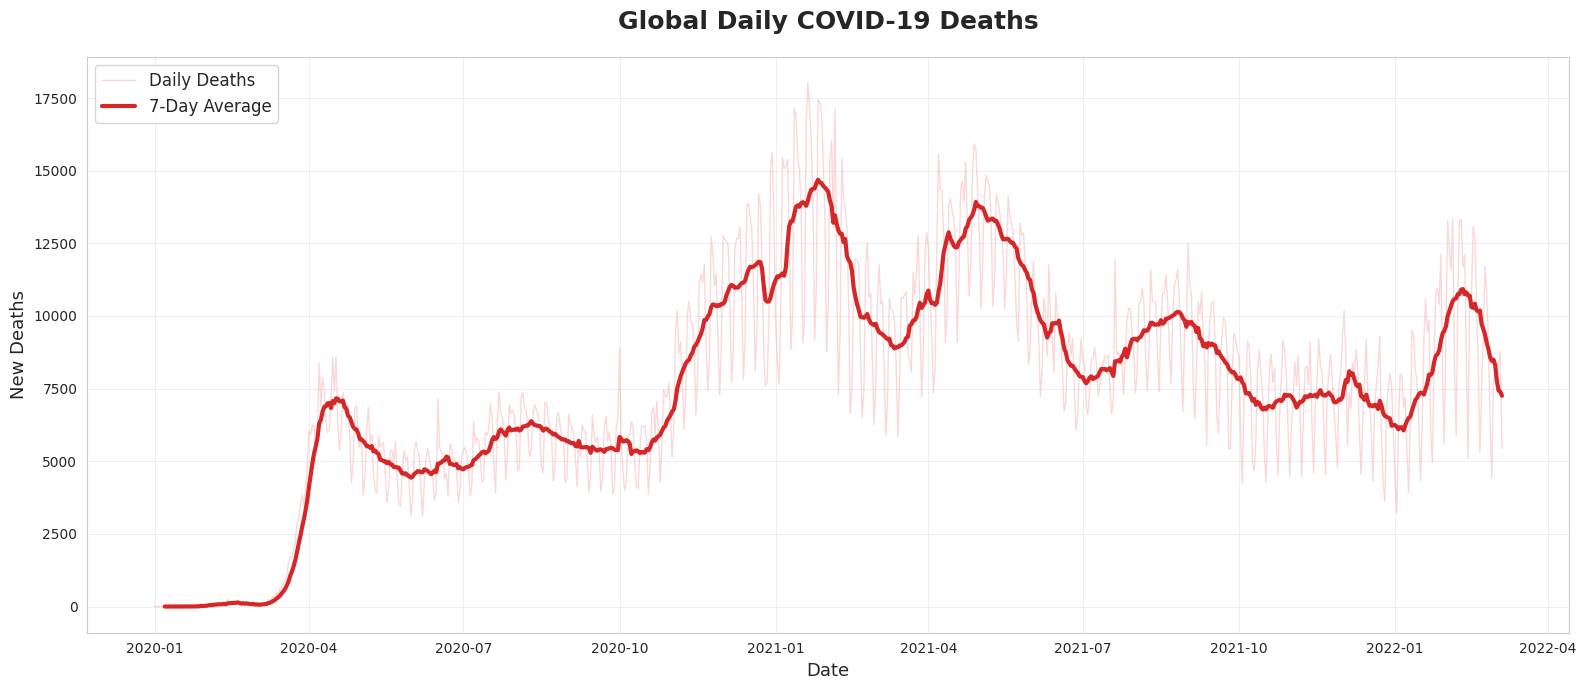

Peak daily deaths: 18,020
Date of peak: 2021-01-20T00:00:00.000000000


In [11]:
# Plot global daily deaths
plt.figure(figsize=(16, 7))

# Plot raw daily data (light)
plt.plot(global_daily['date'], global_daily['new_deaths'], 
         alpha=0.3, color='lightcoral', label='Daily Deaths', linewidth=1)

# Plot 7-day average (bold)
plt.plot(global_daily['date'], global_daily['new_deaths_7day_avg'], 
         linewidth=3, color='#d62728', label='7-Day Average')

plt.title('Global Daily COVID-19 Deaths', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=13)
plt.ylabel('New Deaths', fontsize=13)
plt.legend(fontsize=12, loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Peak daily deaths: {global_daily['new_deaths'].max():,.0f}")
print(f"Date of peak: {global_daily[global_daily['new_deaths'] == global_daily['new_deaths'].max()]['date'].values[0]}")

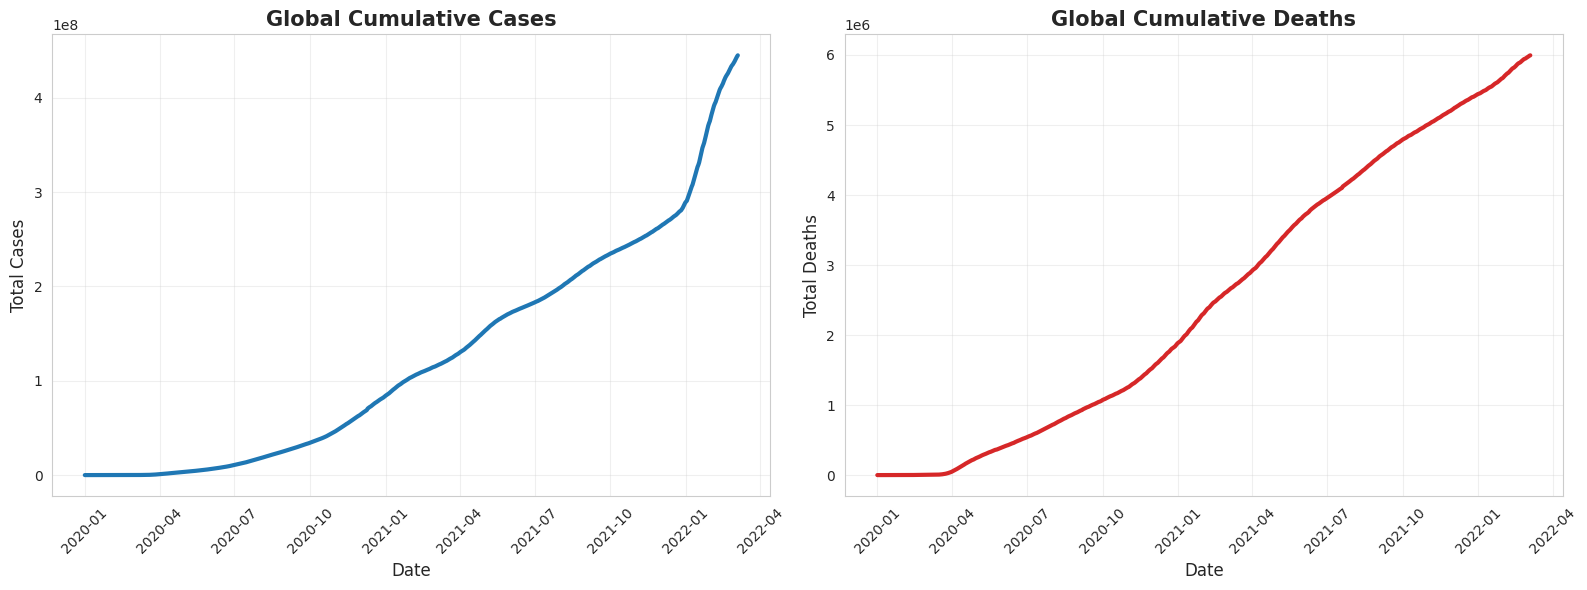

In [12]:
# Create side-by-side plots for cumulative data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Cumulative cases
ax1.plot(global_daily['date'], global_daily['total_cases'], 
         linewidth=3, color='#1f77b4')
ax1.set_title('Global Cumulative Cases', fontsize=15, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Cases', fontsize=12)
ax1.grid(alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Cumulative deaths
ax2.plot(global_daily['date'], global_daily['total_deaths'], 
         linewidth=3, color='#d62728')
ax2.set_title('Global Cumulative Deaths', fontsize=15, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Total Deaths', fontsize=12)
ax2.grid(alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

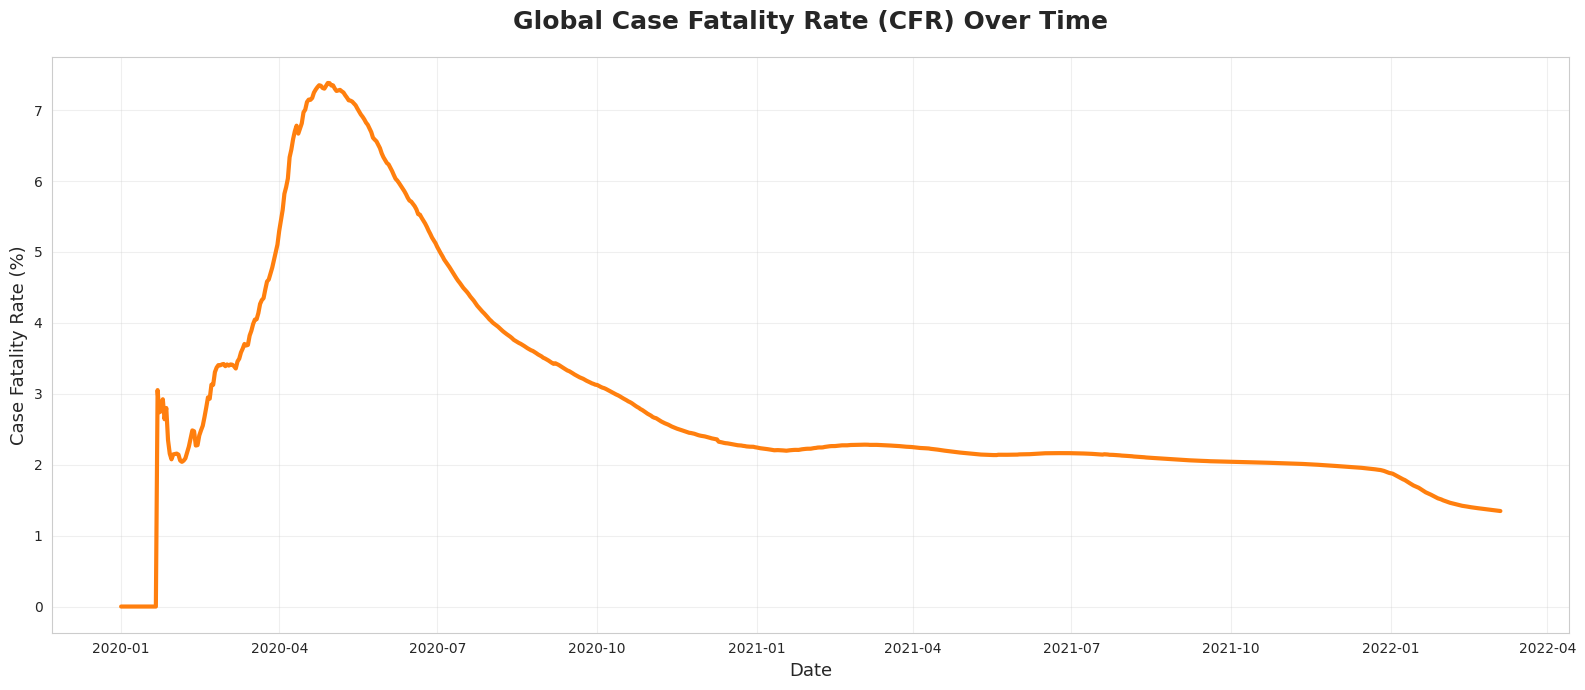

Current Global CFR: 1.35%
Highest CFR: 7.38%
Lowest CFR: 1.35%


In [13]:
# Plot Case Fatality Rate over time
plt.figure(figsize=(16, 7))
plt.plot(global_daily['date'], global_daily['cfr'], 
         linewidth=3, color='#ff7f0e')
plt.title('Global Case Fatality Rate (CFR) Over Time', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Case Fatality Rate (%)', fontsize=13)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Current Global CFR: {global_daily['cfr'].iloc[-1]:.2f}%")
print(f"Highest CFR: {global_daily['cfr'].max():.2f}%")
print(f"Lowest CFR: {global_daily['cfr'][global_daily['cfr'] > 0].min():.2f}%")

In [14]:
# Get the most recent data for each country
latest_date = df_countries['date'].max()
latest_data = df_countries[df_countries['date'] == latest_date].copy()

print(f"Latest data date: {latest_date}")
print(f"Countries in latest data: {len(latest_data)}")

# Get top countries by total cases
top_cases = latest_data.nlargest(15, 'total_cases')

# Get top countries by total deaths
top_deaths = latest_data.nlargest(15, 'total_deaths')

print("\n" + "="*70)
print("TOP 10 COUNTRIES BY TOTAL CASES:")
print("="*70)
for idx, row in top_cases.head(10).iterrows():
    print(f"{row['location']:25s}: {row['total_cases']:>15,.0f} cases")

Latest data date: 2022-03-05 00:00:00
Countries in latest data: 216

TOP 10 COUNTRIES BY TOTAL CASES:
United States            :      79,265,726 cases
India                    :      42,962,953 cases
Brazil                   :      29,040,800 cases
France                   :      23,064,766 cases
United Kingdom           :      19,172,095 cases
Russia                   :      16,619,507 cases
Germany                  :      15,830,112 cases
Turkey                   :      14,326,217 cases
Italy                    :      12,990,223 cases
Spain                    :      11,100,428 cases


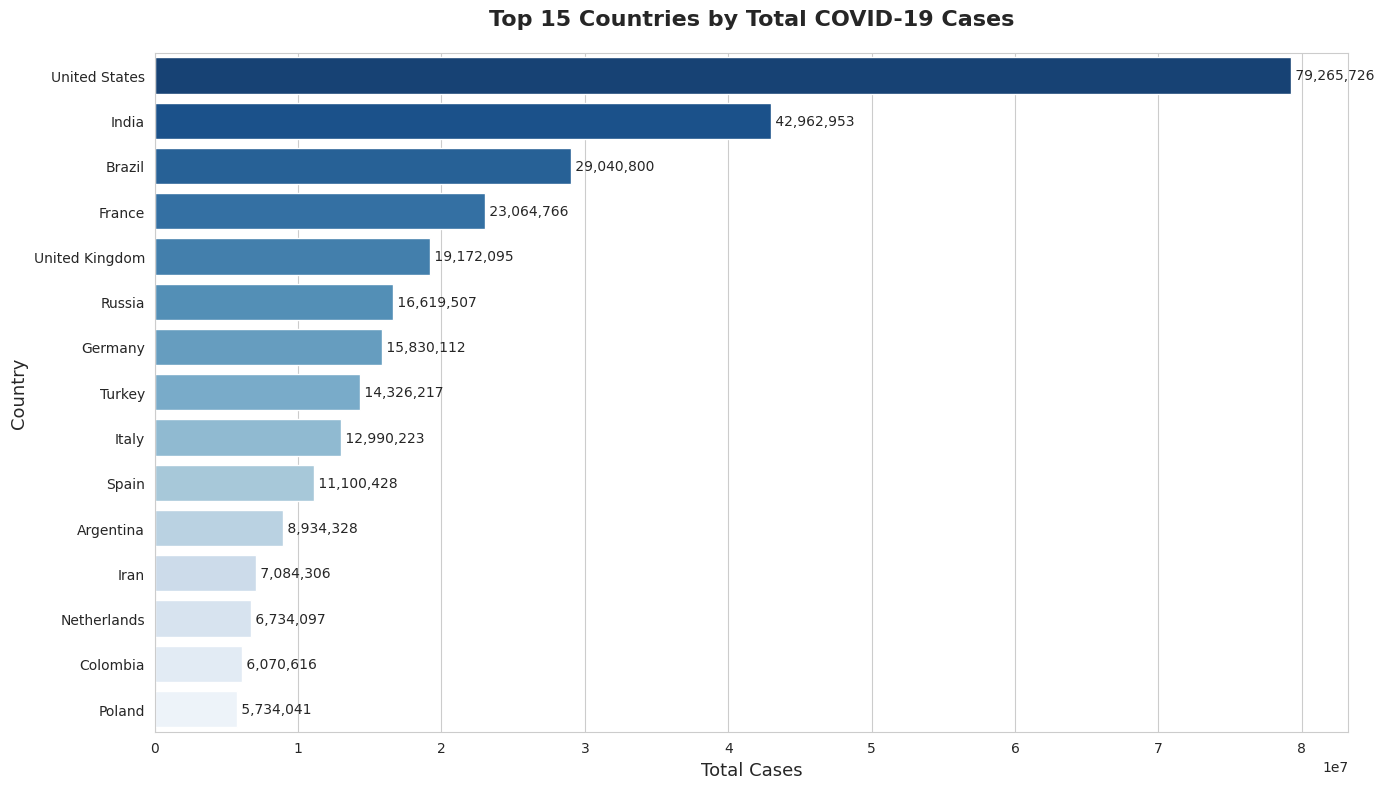

In [15]:
# Horizontal bar chart of top 15 countries by total cases
plt.figure(figsize=(14, 8))
sns.barplot(data=top_cases, y='location', x='total_cases', palette='Blues_r')
plt.title('Top 15 Countries by Total COVID-19 Cases', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Cases', fontsize=13)
plt.ylabel('Country', fontsize=13)

# Add value labels on bars
for i, v in enumerate(top_cases['total_cases']):
    plt.text(v, i, f' {v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

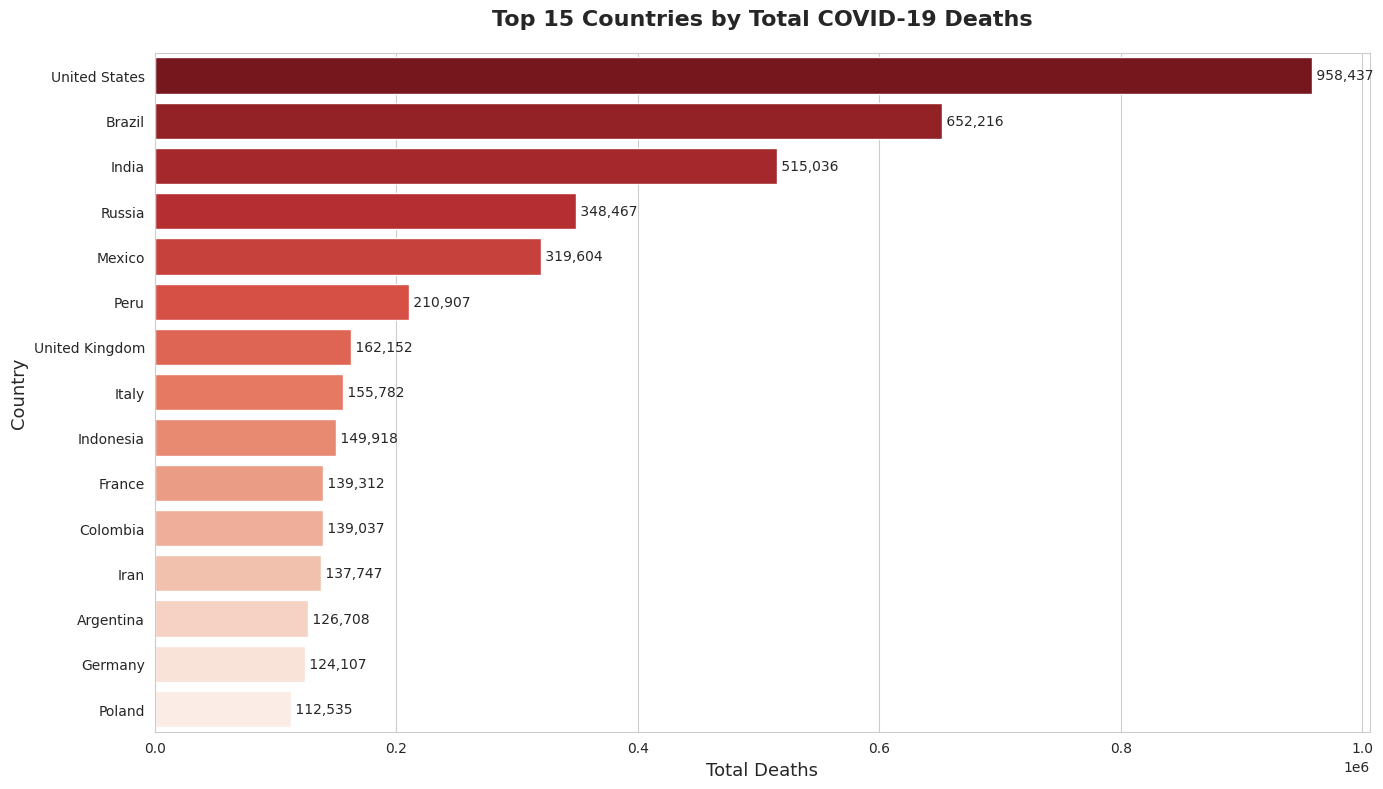

In [16]:
# Horizontal bar chart of top 15 countries by total deaths
plt.figure(figsize=(14, 8))
sns.barplot(data=top_deaths, y='location', x='total_deaths', palette='Reds_r')
plt.title('Top 15 Countries by Total COVID-19 Deaths', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Deaths', fontsize=13)
plt.ylabel('Country', fontsize=13)

# Add value labels on bars
for i, v in enumerate(top_deaths['total_deaths']):
    plt.text(v, i, f' {v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

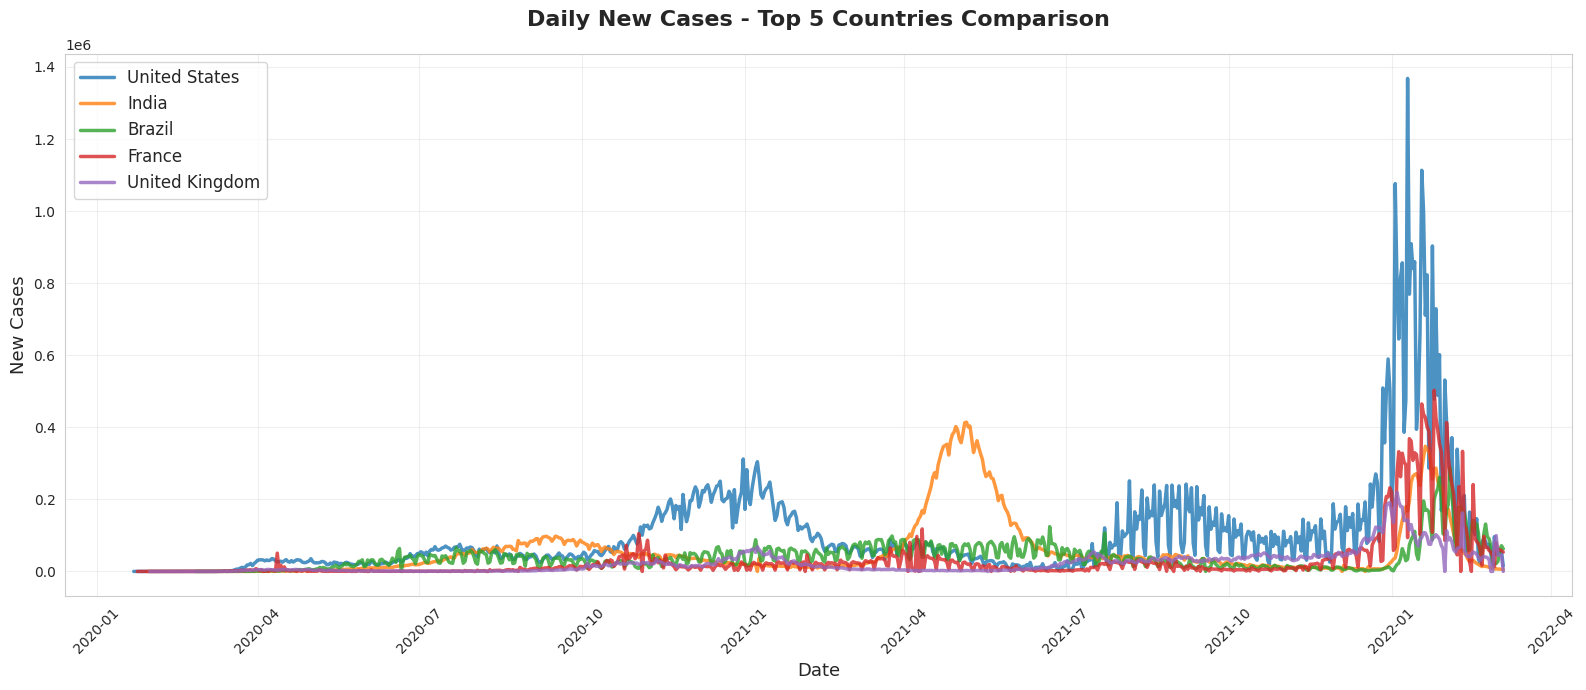

Top 5 countries being compared:
1. United States
2. India
3. Brazil
4. France
5. United Kingdom


In [17]:
# Compare daily cases for top 5 countries
top_5_countries = top_cases.head(5)['location'].tolist()

plt.figure(figsize=(16, 7))

for country in top_5_countries:
    country_data = df_countries[df_countries['location'] == country].sort_values('date')
    plt.plot(country_data['date'], country_data['new_cases'], 
             label=country, linewidth=2.5, alpha=0.8)

plt.title('Daily New Cases - Top 5 Countries Comparison', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=13)
plt.ylabel('New Cases', fontsize=13)
plt.legend(fontsize=12, loc='upper left')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Top 5 countries being compared:")
for i, country in enumerate(top_5_countries, 1):
    print(f"{i}. {country}")

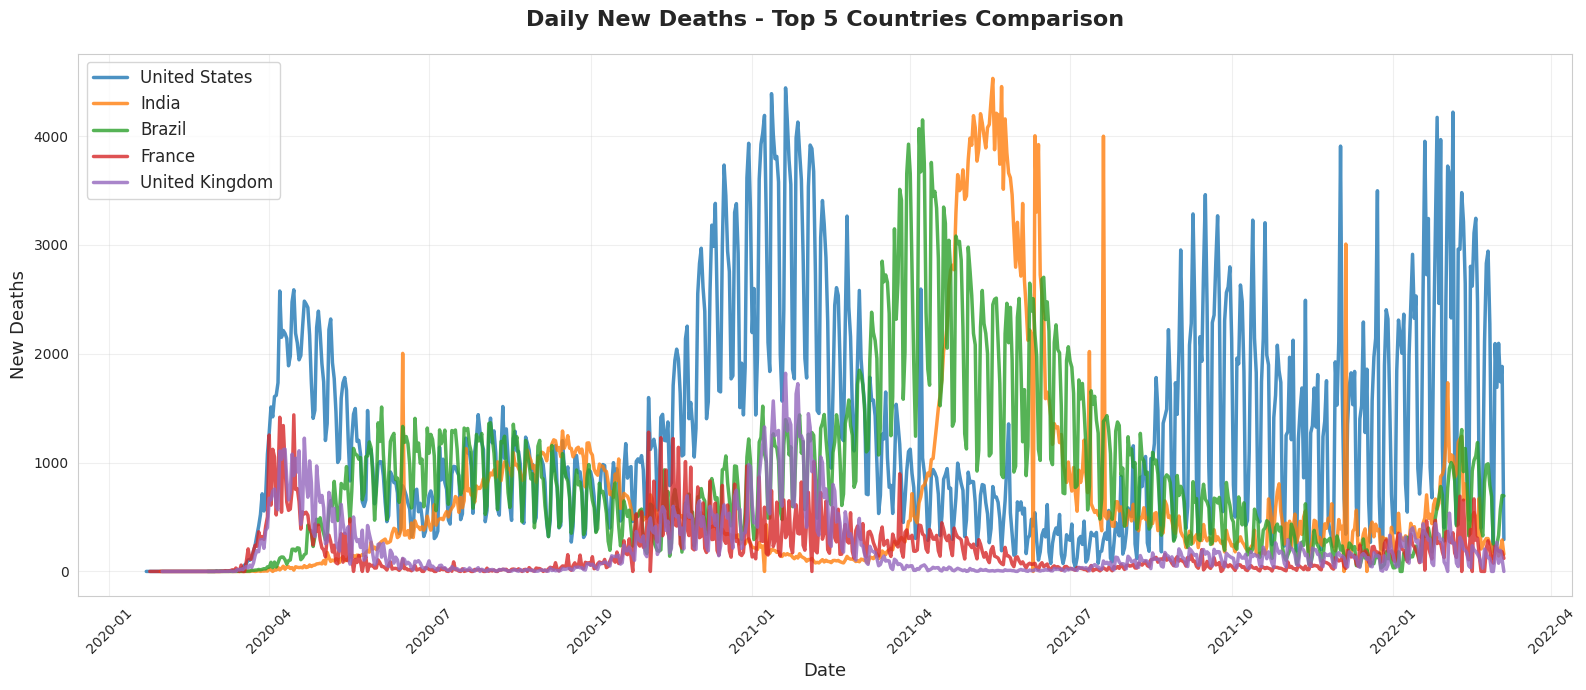

In [18]:
# Compare daily deaths for top 5 countries
plt.figure(figsize=(16, 7))

for country in top_5_countries:
    country_data = df_countries[df_countries['location'] == country].sort_values('date')
    plt.plot(country_data['date'], country_data['new_deaths'], 
             label=country, linewidth=2.5, alpha=0.8)

plt.title('Daily New Deaths - Top 5 Countries Comparison', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=13)
plt.ylabel('New Deaths', fontsize=13)
plt.legend(fontsize=12, loc='upper left')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Extract continental data from the original dataframe
continents = ['Europe', 'Asia', 'North America', 'South America', 'Africa', 'Oceania']
continent_data = df[df['location'].isin(continents)].copy()
continent_data['date'] = pd.to_datetime(continent_data['date'])

print(" Continental data prepared!")
print(f"Continents included: {continent_data['location'].nunique()}")
print(f"Date range: {continent_data['date'].min()} to {continent_data['date'].max()}")

# Show latest stats by continent
latest_continent = continent_data[continent_data['date'] == continent_data['date'].max()]
print("\n" + "="*70)
print("LATEST STATISTICS BY CONTINENT:")
print("="*70)
for _, row in latest_continent.iterrows():
    print(f"{row['location']:20s}: {row['total_cases']:>15,.0f} cases, {row['total_deaths']:>12,.0f} deaths")

 Continental data prepared!
Continents included: 6
Date range: 2020-01-22 00:00:00 to 2022-03-05 00:00:00

LATEST STATISTICS BY CONTINENT:
Africa              :      11,268,386 cases,      249,206 deaths
Asia                :     120,758,420 cases,    1,363,608 deaths
Europe              :     161,250,662 cases,    1,725,140 deaths
North America       :      93,397,289 cases,    1,387,009 deaths
Oceania             :       3,831,682 cases,        8,037 deaths
South America       :      54,622,339 cases,    1,262,230 deaths


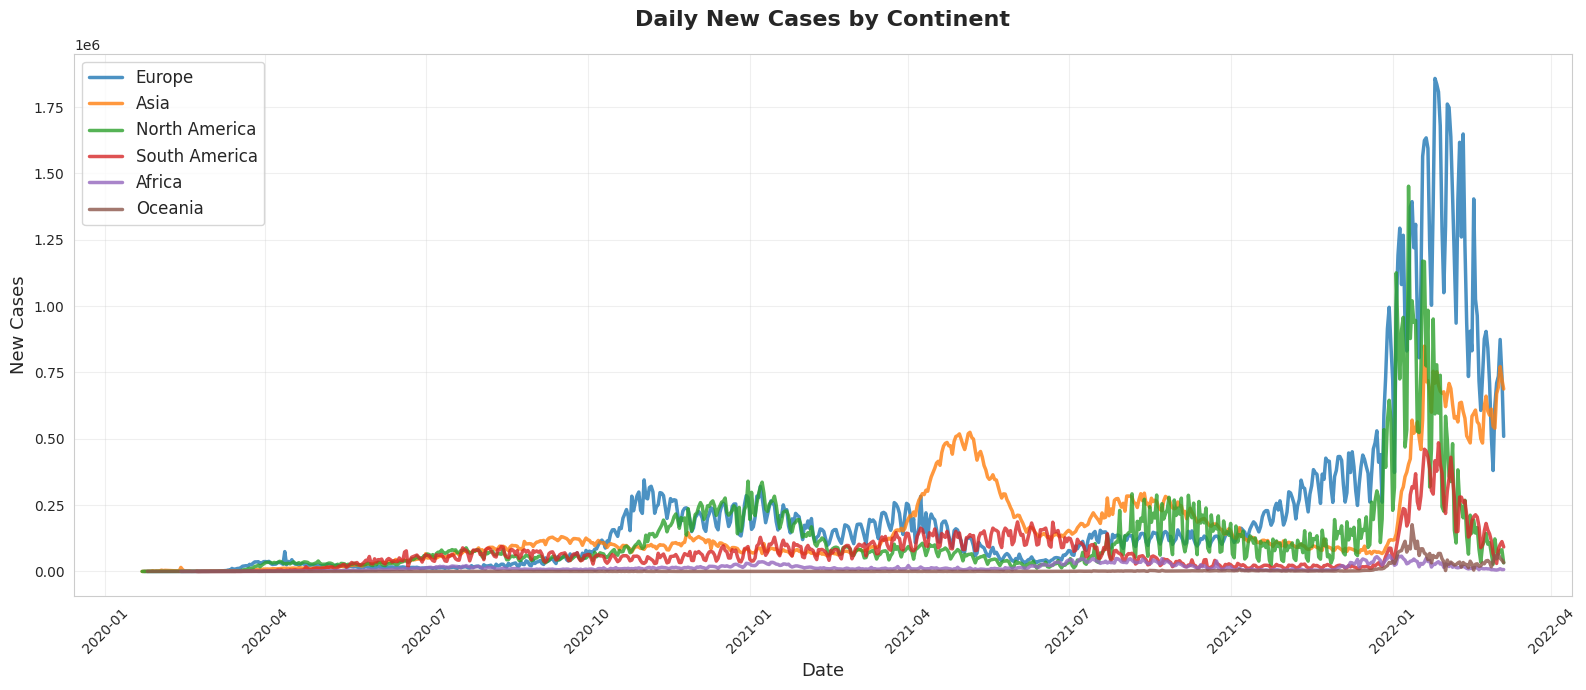

In [20]:
# Plot daily new cases by continent
plt.figure(figsize=(16, 7))

for continent in continents:
    cont_data = continent_data[continent_data['location'] == continent].sort_values('date')
    plt.plot(cont_data['date'], cont_data['new_cases'], 
             label=continent, linewidth=2.5, alpha=0.8)

plt.title('Daily New Cases by Continent', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=13)
plt.ylabel('New Cases', fontsize=13)
plt.legend(fontsize=12, loc='upper left')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

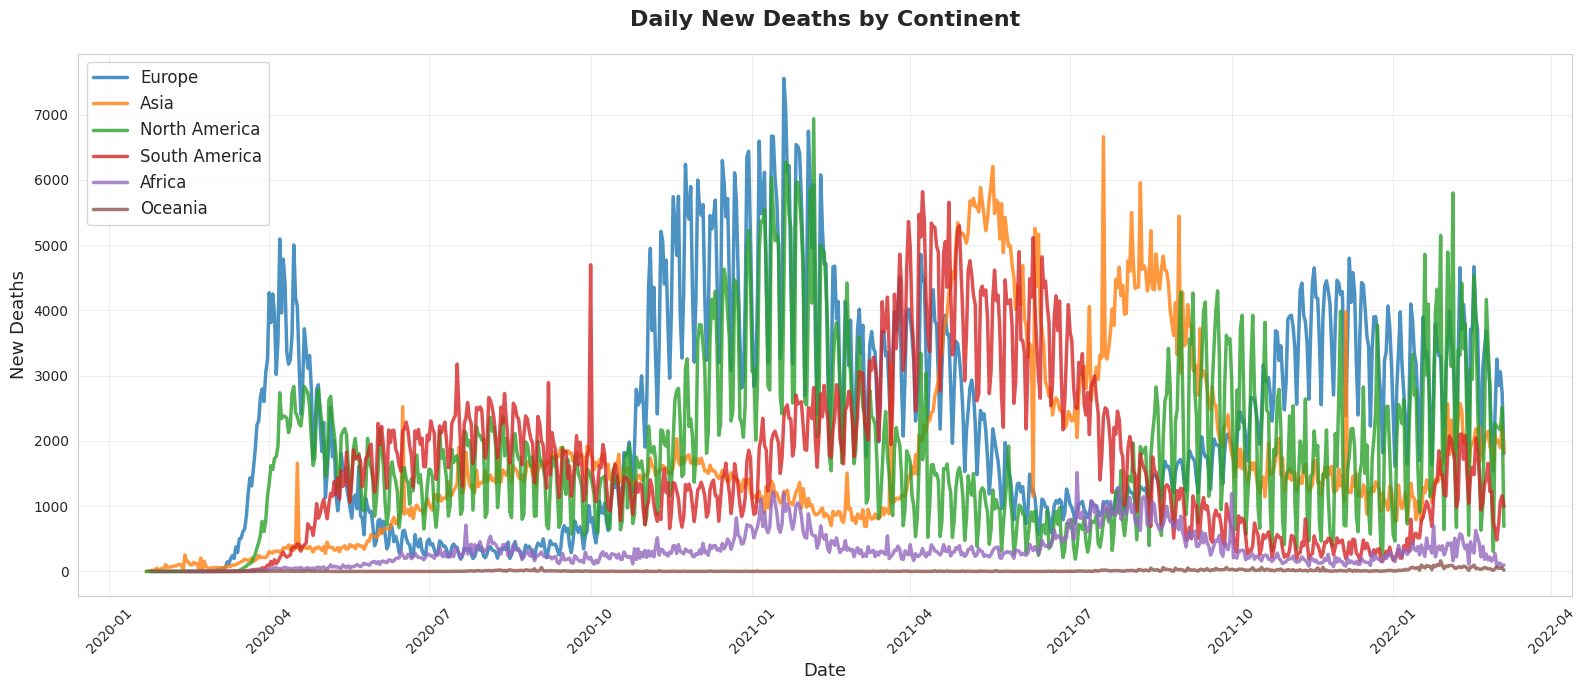

In [21]:
# Plot daily new deaths by continent
plt.figure(figsize=(16, 7))

for continent in continents:
    cont_data = continent_data[continent_data['location'] == continent].sort_values('date')
    plt.plot(cont_data['date'], cont_data['new_deaths'], 
             label=continent, linewidth=2.5, alpha=0.8)

plt.title('Daily New Deaths by Continent', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=13)
plt.ylabel('New Deaths', fontsize=13)
plt.legend(fontsize=12, loc='upper left')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

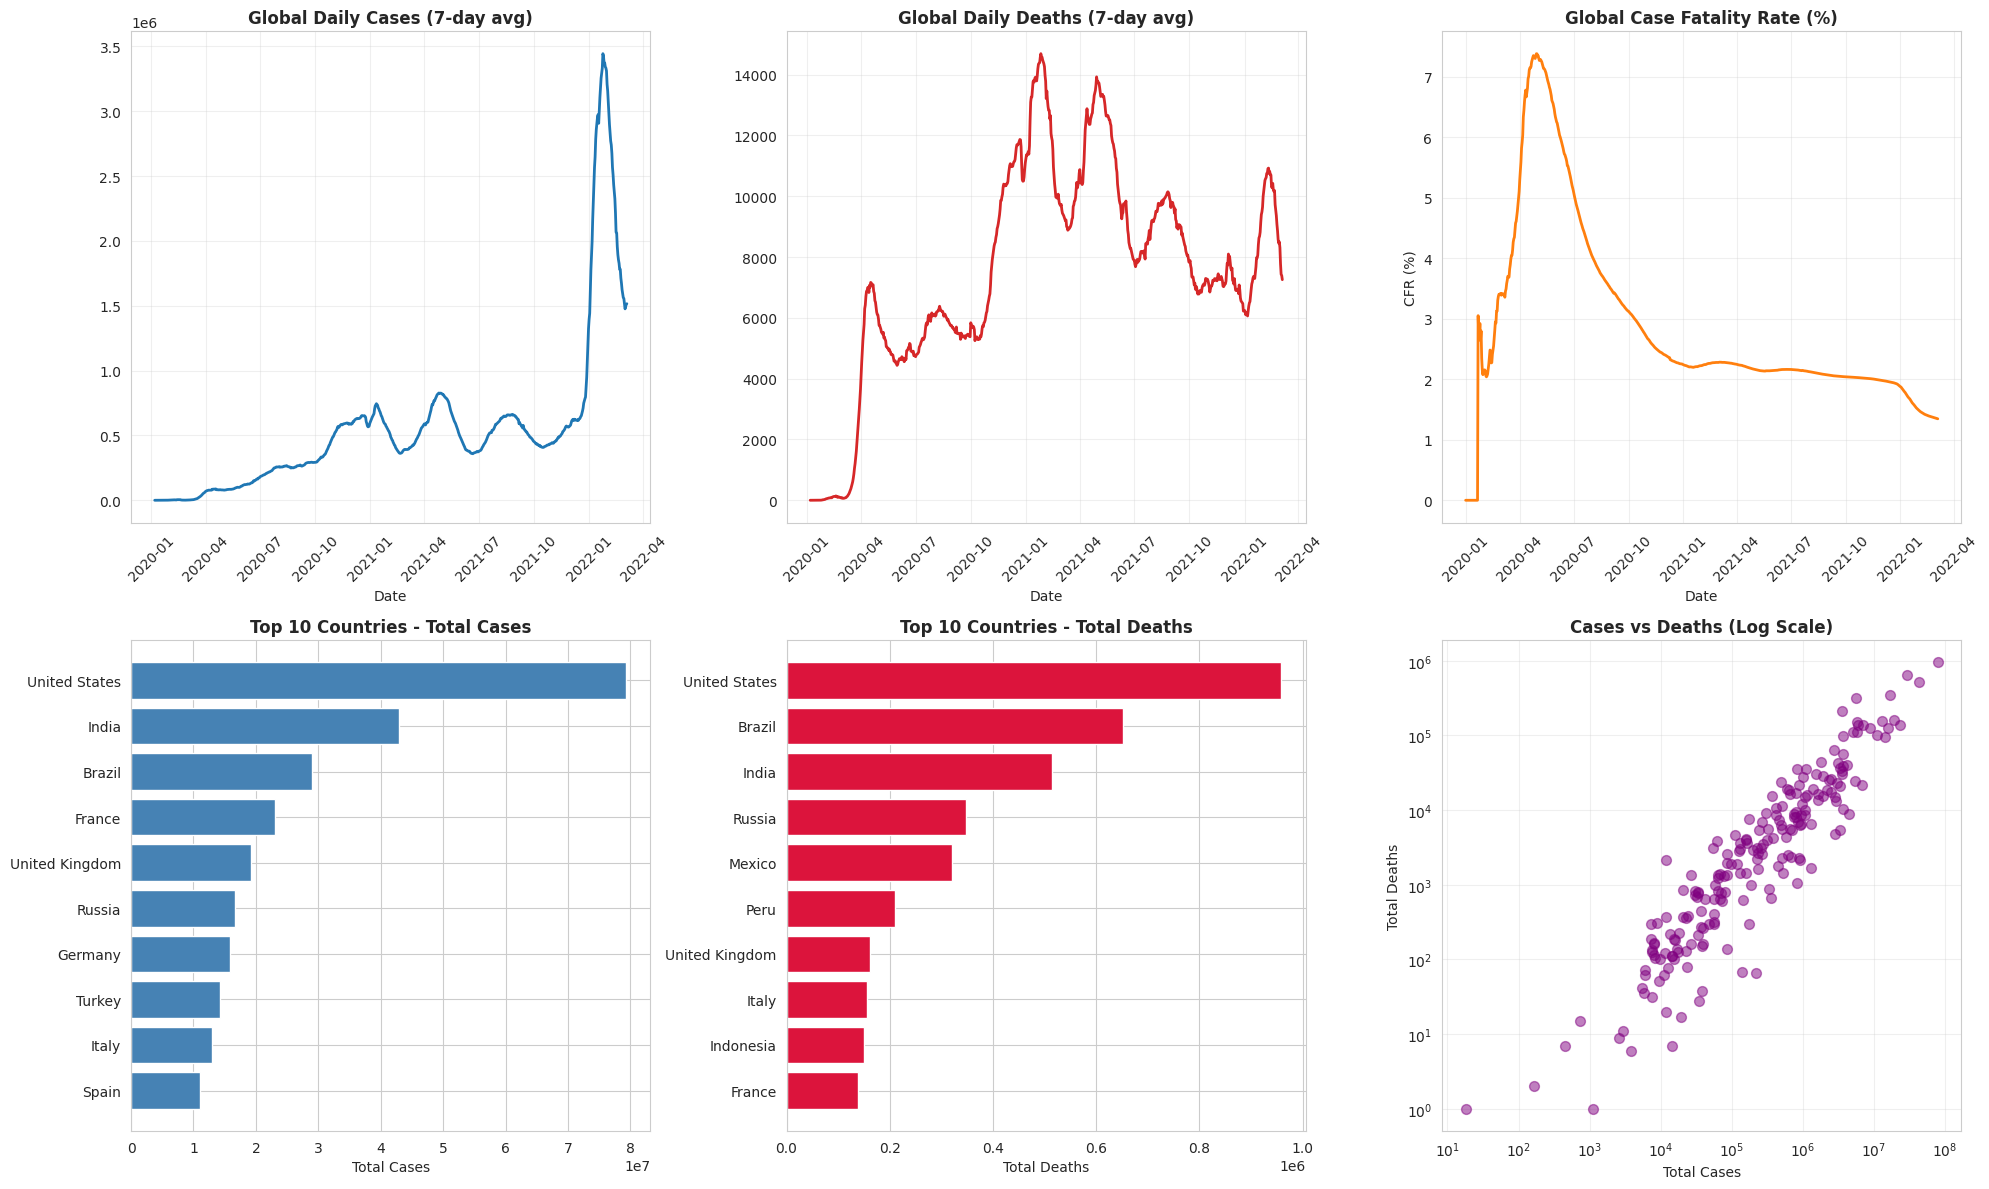

In [22]:
# Create a comprehensive 6-panel dashboard
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Panel 1: Global daily cases (7-day avg)
axes[0, 0].plot(global_daily['date'], global_daily['new_cases_7day_avg'], 
                linewidth=2, color='#1f77b4')
axes[0, 0].set_title('Global Daily Cases (7-day avg)', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Date')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(alpha=0.3)

# Panel 2: Global daily deaths (7-day avg)
axes[0, 1].plot(global_daily['date'], global_daily['new_deaths_7day_avg'], 
                linewidth=2, color='#d62728')
axes[0, 1].set_title('Global Daily Deaths (7-day avg)', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Date')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(alpha=0.3)

# Panel 3: Case Fatality Rate
axes[0, 2].plot(global_daily['date'], global_daily['cfr'], 
                linewidth=2, color='#ff7f0e')
axes[0, 2].set_title('Global Case Fatality Rate (%)', fontweight='bold', fontsize=12)
axes[0, 2].set_xlabel('Date')
axes[0, 2].set_ylabel('CFR (%)')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].grid(alpha=0.3)

# Panel 4: Top 10 countries by cases
top_10_cases = latest_data.nlargest(10, 'total_cases')
axes[1, 0].barh(top_10_cases['location'], top_10_cases['total_cases'], color='steelblue')
axes[1, 0].set_title('Top 10 Countries - Total Cases', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Total Cases')
axes[1, 0].invert_yaxis()

# Panel 5: Top 10 countries by deaths
top_10_deaths = latest_data.nlargest(10, 'total_deaths')
axes[1, 1].barh(top_10_deaths['location'], top_10_deaths['total_deaths'], color='crimson')
axes[1, 1].set_title('Top 10 Countries - Total Deaths', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Total Deaths')
axes[1, 1].invert_yaxis()

# Panel 6: Cases vs Deaths correlation (log scale)
valid_data = latest_data[(latest_data['total_cases'] > 0) & (latest_data['total_deaths'] > 0)]
axes[1, 2].scatter(valid_data['total_cases'], valid_data['total_deaths'], 
                   alpha=0.5, s=50, color='purple')
axes[1, 2].set_title('Cases vs Deaths (Log Scale)', fontweight='bold', fontsize=12)
axes[1, 2].set_xlabel('Total Cases')
axes[1, 2].set_ylabel('Total Deaths')
axes[1, 2].set_xscale('log')
axes[1, 2].set_yscale('log')
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
# Generate comprehensive statistical summary
print("="*70)
print("COVID-19 ANALYSIS - FINAL SUMMARY STATISTICS")
print("="*70)

# Global statistics
print(f"\n GLOBAL STATISTICS (as of {latest_date.strftime('%Y-%m-%d')}):")
print(f"  • Total Cases: {global_daily['total_cases'].iloc[-1]:,.0f}")
print(f"  • Total Deaths: {global_daily['total_deaths'].iloc[-1]:,.0f}")
print(f"  • Case Fatality Rate: {global_daily['cfr'].iloc[-1]:.2f}%")
print(f"  • Countries Affected: {df_countries['location'].nunique()}")

# Recent trends (last 7 days)
recent_cases = global_daily['new_cases_7day_avg'].iloc[-1]
recent_deaths = global_daily['new_deaths_7day_avg'].iloc[-1]
print(f"\n RECENT TRENDS (Last 7 days average):")
print(f"  • Daily New Cases: {recent_cases:,.0f}")
print(f"  • Daily New Deaths: {recent_deaths:,.0f}")

# Peak statistics
peak_cases_date = global_daily[global_daily['new_cases'] == global_daily['new_cases'].max()]['date'].values[0]
peak_deaths_date = global_daily[global_daily['new_deaths'] == global_daily['new_deaths'].max()]['date'].values[0]
print(f"\n PEAK STATISTICS:")
print(f"  • Highest Daily Cases: {global_daily['new_cases'].max():,.0f} on {peak_cases_date}")
print(f"  • Highest Daily Deaths: {global_daily['new_deaths'].max():,.0f} on {peak_deaths_date}")

# Top 5 countries
print(f"\n TOP 5 COUNTRIES BY TOTAL CASES:")
for idx, row in top_cases.head(5).iterrows():
    cfr = (row['total_deaths'] / row['total_cases'] * 100) if row['total_cases'] > 0 else 0
    print(f"  {row['location']:20s}: {row['total_cases']:>12,.0f} cases | {row['total_deaths']:>10,.0f} deaths | CFR: {cfr:.2f}%")

print("\n" + "="*70)

COVID-19 ANALYSIS - FINAL SUMMARY STATISTICS

 GLOBAL STATISTICS (as of 2022-03-05):
  • Total Cases: 445,129,499
  • Total Deaths: 5,995,245
  • Case Fatality Rate: 1.35%
  • Countries Affected: 226

 RECENT TRENDS (Last 7 days average):
  • Daily New Cases: 1,515,780
  • Daily New Deaths: 7,255

 PEAK STATISTICS:
  • Highest Daily Cases: 4,206,334 on 2022-01-19T00:00:00.000000000
  • Highest Daily Deaths: 18,020 on 2021-01-20T00:00:00.000000000

 TOP 5 COUNTRIES BY TOTAL CASES:
  United States       :   79,265,726 cases |    958,437 deaths | CFR: 1.21%
  India               :   42,962,953 cases |    515,036 deaths | CFR: 1.20%
  Brazil              :   29,040,800 cases |    652,216 deaths | CFR: 2.25%
  France              :   23,064,766 cases |    139,312 deaths | CFR: 0.60%
  United Kingdom      :   19,172,095 cases |    162,152 deaths | CFR: 0.85%

